<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Covid_19_VAEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 with VAEs

## Confirmed Covid-19 cases

### Data

#### Load it

In [1]:
!rm -f master.zip
!rm -rf COVID-19-master
!wget https://github.com/CSSEGISandData/COVID-19/archive/master.zip
!unzip master > null

--2020-03-30 20:44:50--  https://github.com/CSSEGISandData/COVID-19/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/CSSEGISandData/COVID-19/zip/master [following]
--2020-03-30 20:44:50--  https://codeload.github.com/CSSEGISandData/COVID-19/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58074237 (55M) [application/zip]
Saving to: ‘master.zip’

master.zip          100%[===================>]  55.38M  31.4MB/s    in 1.8s    

2020-03-30 20:44:52 (31.4 MB/s) - ‘master.zip’ saved [58074237/58074237]



In [0]:
import re
import pandas as pd
from collections import OrderedDict

# ls gives the files sorted alphabetically which is the correct time order
files = !ls COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/*.csv
dates = [re.search('/([0-9\-]+)\.csv$', file).group(1) for file in files]

# keep the order
df_dict = OrderedDict((date, pd.read_csv(file_name)) 
                      for date, file_name in zip(dates,files))

#### Create time series

In [0]:
for date, df in df_dict.items():

  if 'Province/State' in df.columns:
    zip_all = zip(pd.isnull(df.loc[:,'Province/State']),
                  df.loc[:,'Country/Region'],
                  df.loc[:,'Province/State'])
    
    row_index = ['{}, {}'.format(province, country) if not missing 
                 else country for (missing,country,province) 
                 in zip_all]
  else:
    row_index = df.loc[:,'Combined_Key'].tolist()

  df_dict[date] = pd.DataFrame(df.values, index=row_index, columns=df.columns)

confirmed = pd.DataFrame(OrderedDict((date,df.Confirmed) for date,df in df_dict.items()))
confirmed.to_csv('covid19_confirmed.csv')

#### Aggregate counties into states

In [4]:
!pip install us

     |████████████████████████████████| 133kB 6.6MB/s 
  Created wheel for us: filename=us-1.0.0-cp36-none-any.whl size=11833 sha256=20b97ca5b697586fb6ba2f71400d810d069b7a7da36e4364acae6fbb984b8946
  Stored in directory: /root/.cache/pip/wheels/b3/98/40/cb8be35d7779a0ae4372c84e7a585c947bfc41540fd8999e53
  Created wheel for jellyfish: filename=jellyfish-0.5.6-cp36-cp36m-linux_x86_64.whl size=74542 sha256=992d390f97107167b31675a79107f9d09cd426fdbc9490da53ffc5bebc52ef55
  Stored in directory: /root/.cache/pip/wheels/3b/29/06/8d686d24f742cb89e7bde7f26f18cb9e89b3c8bcd6999cb12a
Successfully built us jellyfish


In [0]:
import us

state_dict = us.states.mapping('abbr', 'name')

In [0]:
import numpy as np

prog = re.compile('[a-zA-Z. ]+, *(\w{2}), *US')
location = np.array([state_dict[prog.search(index).group(1)] +', US'
                    if prog.search(index) != None 
                    else index
                    for index in confirmed.index])

prog = re.compile('[a-zA-Z. ]+, *([a-zA-Z. ]+), *US')
location = np.array([prog.search(index).group(1) +', US'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('^(?P<name>[a-zA-Z. ]+), *(?P=name)$')
location = np.array([prog.search(index).group('name')
                    if prog.search(index) != None 
                    else index
                    for index in location])


prog = re.compile('^(.*)Mainland China$')
location = np.array([prog.search(index).group(1) +'China'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('(Hong Kong)')
location = np.array(['Hong Kong, China'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('District of Columbia')
location = np.array(['District of Columbia, US'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('D\.C\.')
location = np.array(['District of Columbia, US'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Korea')
location = np.array(['South Korea'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Iran')
location = np.array(['Iran'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Macau')
location = np.array(['Macau'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Russian')
location = np.array(['Russia'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Diamond Princess')
location = np.array(['Diamond Princess'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Virgin Islands')
location = np.array(['Virgin Islands'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Czech Republic')
location = np.array(['Czechia'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Faroe Islands')
location = np.array(['Faroe Islands, Denmark'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Cayman Islands')
location = np.array(['Cayman Islands, United Kingdom'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Gibraltar')
location = np.array(['Gibraltar, United Kingdom'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Curacao')
location = np.array(['Curacao, Netherlands'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('French Guiana')
location = np.array(['French Guiana, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Fench Guiana, France')
location = np.array(['French Guiana, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Gambia')
location = np.array(['Gambia'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Grand Princess')
location = np.array(['Grand Princess'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Guadeloupe')
location = np.array(['Guadeloupe, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('OR , US')
location = np.array(['Oregon, US'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Martinique')
location = np.array(['Martinique, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Mayotte')
location = np.array(['Mayotte, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Martin')
location = np.array(['St Martin, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Reunion')
location = np.array(['Reunion, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Saint Barthelemy')
location = np.array(['Saint Barthelemy, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('ON, Canada')
location = np.array(['Ontario, Canada'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Taiwan')
location = np.array(['Taiwan'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('^UK')
location = np.array(['United Kingdom'
                    if prog.search(index) != None 
                    else index
                    for index in location])


prog = re.compile('Aruba')
location = np.array(['Aruba, Netherlands'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Bahamas')
location = np.array(['Bahamas'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Greenland')
location = np.array(['Greenland, Denmark'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Channel Islands')
location = np.array(['Channel Islands, United Kingdom'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Viet Nam')
location = np.array(['Vietnam'
                    if prog.search(index) != None 
                    else index
                    for index in location])

#list(filter(lambda x: x != None,location.tolist()))

In [7]:
confirmed = pd.DataFrame({loc:confirmed.loc[location == loc].sum() for loc in location}).T
confirmed.shape

(339, 68)

#### Fix France March 23rd

In [8]:
confirmed.loc["France"].loc['03-23-2020'],confirmed.loc["French Polynesia, France"].loc['03-23-2020']

(0.0, 19874.0)

In [9]:
confirmed.loc["France"].loc['03-23-2020'] = confirmed.loc["French Polynesia, France"].loc['03-23-2020']
confirmed.loc["French Polynesia, France"].loc['03-23-2020']= \
((confirmed.loc["French Polynesia, France"].loc['03-22-2020']
 +confirmed.loc["French Polynesia, France"].loc['03-24-2020'])/2)

confirmed.loc["France"].loc['03-23-2020'],confirmed.loc["French Polynesia, France"].loc['03-23-2020']

(19874.0, 20.0)

In [0]:
confirmed.to_csv('covid19_confirmed.csv')

#### Create train-test split

In [11]:
from sklearn.model_selection import train_test_split 
x_train, x_test = train_test_split(confirmed, test_size=0.25, random_state=42)
confirmed = pd.concat([x_train,x_test], axis=0)

x_train.shape, x_test.shape

((254, 68), (85, 68))

#### Transform to log(1+x)

In [0]:
from sklearn.model_selection import train_test_split 

x_train, x_test = train_test_split(confirmed, test_size=0.25, random_state=42)

confirmed = pd.concat([x_train,x_test], axis=0)

x = np.log(x_train.values + 1)
max_train_log = np.max(x) 
x /= max_train_log
x_train = pd.DataFrame(x,index=x_train.index, 
                       columns=x_train.columns)

x = np.log(x_test.values + 1)
x /= max_train_log
x_test = pd.DataFrame(x,index=x_test.index, 
                       columns=x_test.columns)

### Network

#### Build the VAE

In [13]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [14]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [0]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

def make_vae(input_shape):

  latent_dim = 1  
  dense_width = 1024

  input_x = keras.Input(shape=input_shape)

  x = layers.Dense(dense_width, activation='relu')(input_x)
  x = layers.Dense(dense_width, activation='relu')(x)
  x = layers.Dense(dense_width, activation='relu')(x)

  z_mean = layers.Dense(latent_dim)(x)
  z_log_var = layers.Dense(latent_dim)(x)

  encoder = Model(input_x, z_mean)

  def sampling(args):
      z_mean, z_log_var = args
      epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                                mean=0., stddev=1.)
      return z_mean + K.exp(z_log_var) * epsilon

  z = layers.Lambda(sampling)([z_mean, z_log_var])

  # This is the input where we will feed `z`.
  decoder_input = layers.Input(K.int_shape(z)[1:])

  # Upsample to the correct number of units
  x = layers.Dense(dense_width,activation='relu')(decoder_input)
  x = layers.Dense(dense_width,activation='relu')(x)
  x = layers.Dense(dense_width,activation='relu')(x)

  x = layers.Dense(input_shape[0])(x)

  # This is our decoder model.
  decoder = Model(decoder_input, x)

  # We then apply it to `z` to recover the decoded `z`.
  z_decoded = decoder(z)

  class CustomVariationalLayer(keras.layers.Layer):

      def vae_loss(self, x, z_decoded):
          xent_loss = keras.metrics.mse(x, z_decoded)
          kl_loss = -5e-4 * K.mean(
              1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
          return K.mean(xent_loss + kl_loss)

      def call(self, inputs):
          x = inputs[0]
          z_decoded = inputs[1]
          loss = self.vae_loss(x, z_decoded)
          self.add_loss(loss, inputs=inputs)
          # We don't use this output.
          return x

  # We call our custom layer on the input and the decoded output,
  # to obtain the final model output.
  y = CustomVariationalLayer()([input_x, z_decoded])

  vae = Model(input_x, y)
  vae.encoder = encoder
  vae.decoder = decoder

  return vae

#### Train it

In [16]:
from tensorflow import set_random_seed
from numpy.random import seed

seed(100)
set_random_seed(100)

vae = make_vae(input_shape=(x_train.shape[1],))

vae.compile(optimizer='adam', loss=None)

n_batch_sizes=7

history = ['']*n_batch_sizes
titles  = ['']*n_batch_sizes

# Train the VAE on boston housing data

for i in range(n_batch_sizes):

  # Alternate between a few epochs with large batch size (realiable decrease in 
  # loss but weak and overfitting) and a few epochs with small batch size
  # (strong and non-overfitting but could increase loss)
  batch_size = 512*(1-(i%2)) + 16*(i%2)
  epochs = 20*(1-(i%2)) + 60*(i%2)

  print('Batch size:', batch_size)
  titles[i] = 'Round {}, Batch size {}'.format(i+1, batch_size)

  history[i] = vae.fit(x=x_train, y=None,
                       shuffle=True,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(x_test, None))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Batch size: 512
Train on 254 samples, validate on 85 samples
Epoch 1/20
254/254 [==============================] - 9s 34ms/sample - loss: 0.0579 - val_loss: 0.0521
Epoch 2/20
254/254 [==============================] - 0s 37us/sample - loss: 0.0405 - val_loss: 0.0865
Epoch 3/20
254/254 [==============================] - 0s 41us/sample - loss: 0.0756 - val_loss: 0.0402
Epoch 4/20
254/254 [==============================] - 0s 27us/sample - loss: 0.0315 - val_loss: 0.0474
Epoch 5/20
254/254 [==============================] - 0s 24us/sample - loss: 0.0410 - val_loss: 0.0527
Epoch 6/20
254/254 [==============================] - 0s 27us/sample - loss: 0.0452 - val_loss: 0.0532
Epoch 7/20
254/254 [==============================] - 0s 28us/sample - loss: 0.0439 - val_loss: 0.0530
Epoch 8/20
254/254 [==============================] - 0s 27us/sample - loss: 0.0434 - val_loss: 0.0494
Epoch 9/20
254/254 [==============

#### Verify convergence

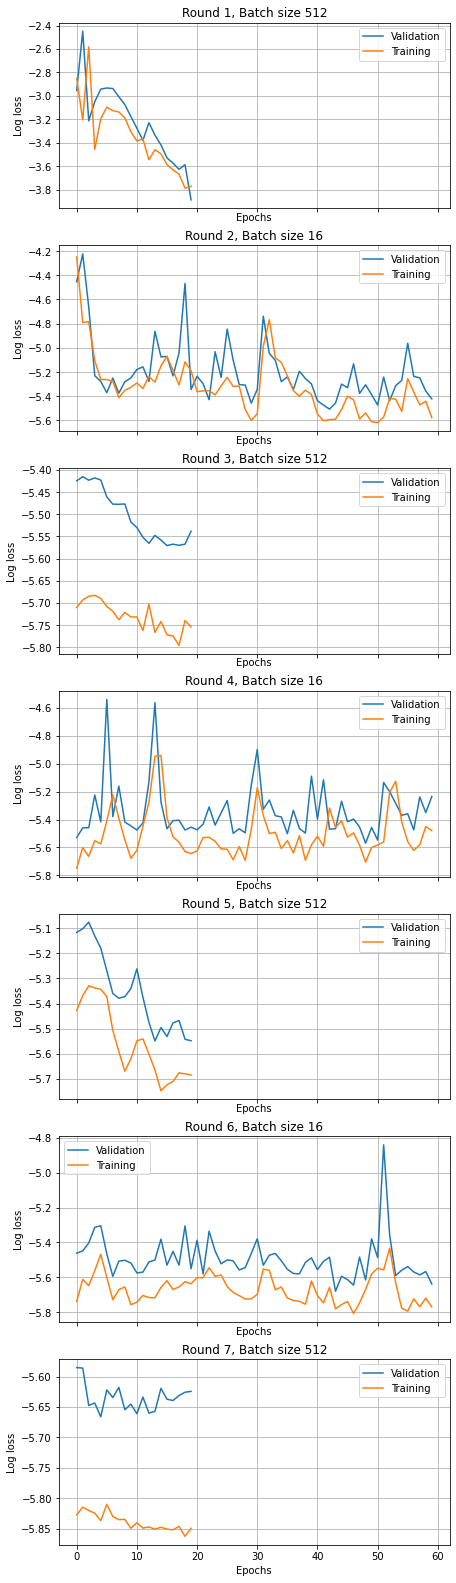

In [17]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(len(history), 1, figsize=(7, len(history)*4), sharex=True)

for i in range(len(history)):

  ax[i].set_title(titles[i])
  ax[i].plot(history[i].epoch, np.log(history[i].history['val_loss']), label='Validation')
  ax[i].plot(history[i].epoch, np.log(history[i].history['loss']), label='Training')
  ax[i].set_xlabel('Epochs')
  ax[i].set_ylabel('Log loss')
  ax[i].legend()
  ax[i].grid()

### Encoding

#### Encode the data

In [18]:
qt = pd.concat([x_train,x_test], axis=0)
qt.head()

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020
"Wuhan Evacuee, US",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142540,0.142540,0.142540,0.000000,0.000000,0.000000,0.000000,0.000000
Indonesia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.097298,0.097298,0.097298,0.097298,0.142540,0.142540,0.172339,0.265316,0.295116,0.314879,0.314879,0.376267,0.405158,0.422515,0.434435,0.456400,0.480849,0.508628,0.523728,0.541261,0.553013,0.563540,0.578535,0.591019,0.601860,0.615852,0.624623,0.634061
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.142540,0.194597,0.260774,0.291895,0.351628,0.386979,0.393462,0.421001,0.435737,0.450034,0.467002,0.483903,0.489007,0.494501,0.502457,0.513595,0.532387,0.536002
",,MS Zaandam",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097298,0.097298
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.061388,0.122777,0.122777,0.122777,0.184165,0.184165,0.184165,0.184165


In [19]:
encoded_data=pd.DataFrame(vae.encoder.predict(qt),index=qt.index, columns=['Type'])
Hubei_sign = np.sign(encoded_data.loc['Hubei, China','Type'])
if Hubei_sign == 1.0:
  encoded_data['Type'] *= -1.0
Hubei_sign, encoded_data.loc['Hubei, China','Type']

(-1.0, -2.7311087)

#### Compute types

In [20]:
min_x, max_x, grid_n = -2, 2, 401
grid_x = np.linspace(min_x,max_x,grid_n)
decoded=vae.decoder.predict(grid_x)
if Hubei_sign == 1.0:
  decoded = np.flip(decoded,axis=0)
decoded.shape

(401, 68)

#### Explore the distribution of types

In [0]:
import seaborn as sns

def plot_type_dist(encoded_data, grid_x, decoded, vertical_n, 
                   feature_labels, n_grid_lines=21):

  fig = plt.figure(figsize=(10,vertical_n*2.5),constrained_layout=True)
  gs = fig.add_gridspec(vertical_n, 1)
  ax1 = fig.add_subplot(gs[0,:])
  ax2 = fig.add_subplot(gs[1:,:])

  min_x, max_x, grid_n = grid_x[0], grid_x[-1], len(grid_x)
  grid_lines = np.linspace(min_x,max_x,n_grid_lines)

  ax1.set_title('Encoded data distribution')
  sns.kdeplot(encoded_data,bw=0.02, shade = True, ax=ax1, gridsize=2000)
  ax1.set_xticks( grid_lines )
  ax1.set_xlim(min_x,max_x)
  ax1.grid(axis='x')

  ax2.set_title('Generated types')

  sns.heatmap(decoded.T,cmap='viridis',ax=ax2, cbar_kws={'orientation':'horizontal'})
  ax2.set_xticks(np.linspace(1,grid_n,n_grid_lines))
  ax2.set_xticklabels(['{:.2}'.format(a) for a in grid_lines ])
  ax2.set_yticklabels(feature_labels)
  ax2.tick_params(axis='y',labelright=True, labelleft=False, 
                  left=False, labelrotation=0)
  ax2.grid(axis='x')

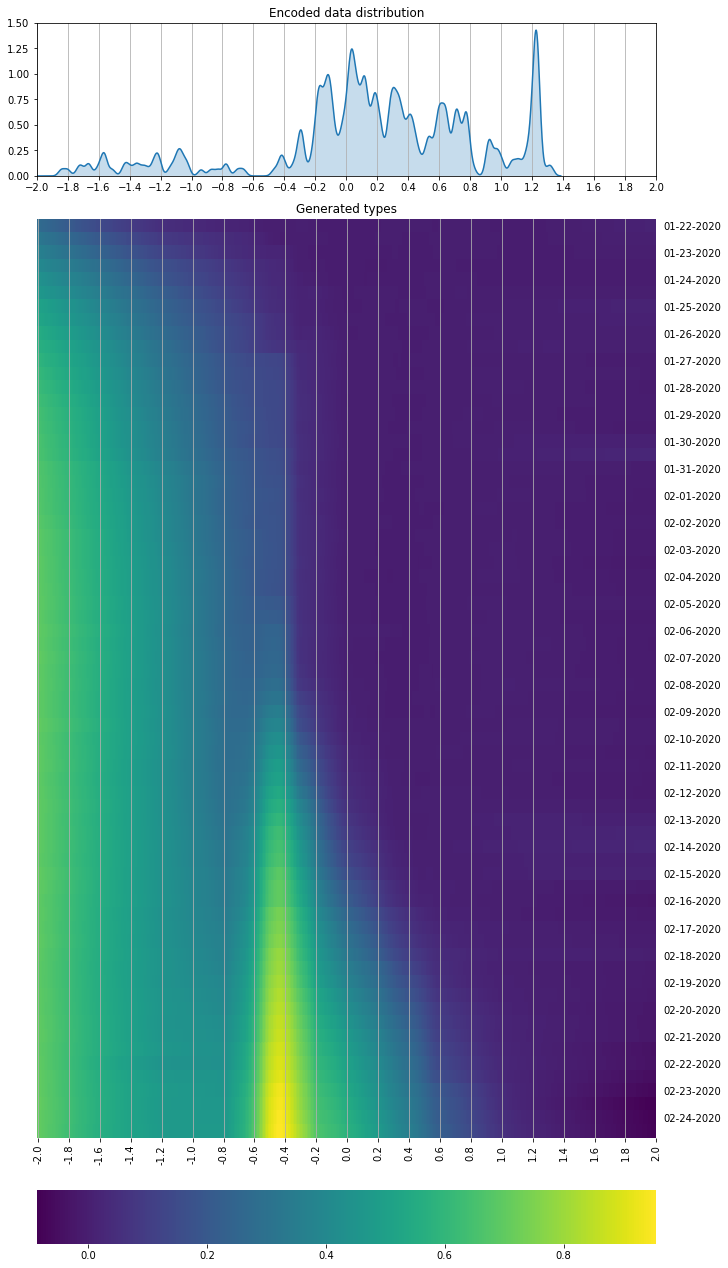

In [22]:
plot_type_dist(encoded_data.values.flatten(), grid_x, decoded, 
               vertical_n=7, feature_labels=qt.columns)

plt.savefig('plot_dist_type.png')

#### Explore encoding sorted data 

In [23]:
data = encoded_data.join(confirmed)

data = data.sort_values(by='Type')

data.to_csv('covid19_confirmed.csv')
data

,Type,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020
"Hubei, China",-2.731109,444.0,444.0,549.0,761.0,1058.0,1423.0,3554.0,3554.0,4903.0,5806.0,7153.0,11177.0,13522.0,16678.0,19665.0,22112.0,24953.0,27100.0,29631.0,31728.0,33366.0,33366.0,48206.0,54406.0,56249.0,58182.0,59989.0,61682.0,62031.0,62442.0,62662.0,64084.0,64084.0,64287.0,64786.0,65187.0,65596.0,65914.0,66337.0,66907.0,67103.0,67217.0,67332.0,67466.0,67592.0,67666.0,67707.0,67743.0,67760.0,67773.0,67781.0,67786.0,67790.0,67794.0,67798.0,67799.0,67800.0,67800.0,67800.0,67800.0,67800.0,67800.0,67801.0,67801.0,67801.0,67801.0,67801.0,67801.0
"Guangdong, China",-1.839364,26.0,32.0,53.0,78.0,111.0,151.0,207.0,277.0,354.0,436.0,535.0,632.0,725.0,813.0,895.0,970.0,1034.0,1095.0,1131.0,1159.0,1177.0,1219.0,1241.0,1261.0,1294.0,1316.0,1322.0,1328.0,1331.0,1332.0,1333.0,1339.0,1342.0,1345.0,1347.0,1347.0,1347.0,1348.0,1349.0,1349.0,1350.0,1350.0,1350.0,1351.0,1352.0,1352.0,1352.0,1352.0,1353.0,1356.0,1356.0,1356.0,1356.0,1360.0,1361.0,1364.0,1370.0,1378.0,1395.0,1400.0,1407.0,1415.0,1428.0,1433.0,1448.0,1456.0,1467.0,1475.0
"Zhejiang, China",-1.799503,10.0,27.0,43.0,62.0,104.0,128.0,173.0,296.0,428.0,538.0,599.0,661.0,724.0,829.0,895.0,954.0,1006.0,1048.0,1075.0,1092.0,1117.0,1131.0,1145.0,1155.0,1162.0,1167.0,1171.0,1172.0,1174.0,1175.0,1203.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1206.0,1213.0,1213.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1227.0,1231.0,1231.0,1232.0,1232.0,1233.0,1234.0,1236.0,1237.0,1238.0,1240.0,1241.0,1243.0,1247.0,1251.0,1254.0
"Henan, China",-1.729468,5.0,5.0,9.0,32.0,83.0,128.0,168.0,206.0,278.0,352.0,422.0,493.0,566.0,675.0,764.0,851.0,914.0,981.0,1033.0,1073.0,1105.0,1135.0,1169.0,1184.0,1212.0,1231.0,1246.0,1257.0,1262.0,1265.0,1267.0,1270.0,1271.0,1271.0,1271.0,1271.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1274.0,1274.0,1274.0,1275.0,1275.0,1275.0,1276.0
"Hunan, China",-1.709450,4.0,9.0,24.0,43.0,69.0,100.0,143.0,221.0,277.0,332.0,389.0,463.0,521.0,593.0,661.0,711.0,772.0,803.0,838.0,879.0,912.0,946.0,968.0,988.0,1001.0,1004.0,1006.0,1007.0,1008.0,1010.0,1011.0,1013.0,1016.0,1016.0,1016.0,1016.0,1017.0,1017.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"None, Lebanon",1.232960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"None, Austria",1.236677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
def plot_by_code(data, center=(-5.0,5.0,0.2), width=0.2):
    centers = np.arange(*center)
    sub_df=OrderedDict((centers[i], 
                        data.loc[(data['Type'] >= centers[i]-width/2)
                                  & (data['Type'] <= 
                                     centers[i] + width/2)].iloc[:,1:])
                       for i in range(len(centers)))
    sub_df = OrderedDict(filter(lambda x: len(x[1])>0, sub_df.items()))
    fig, ax = plt.subplots(1,len(sub_df), 
                           figsize = (5*len(sub_df),3.5), 
                           sharey=True)
    for i, center in zip(range(len(sub_df)),sub_df.keys()):
      sub_df[center]= sub_df[center]+1
      ax[i].plot(sub_df[center].T)
      ax[i].set_yscale('log')
      ax[i].set_ylabel('Confirmed cases')
      ax[i].legend(sub_df[center].index, bbox_to_anchor=(1, -0.3),
                   loc='upper right',borderaxespad=0.)
      ax[i].set_title('Types {:.2f} to {:.2f}'.format(center - width/2,
                                                      center + width/2))
      ax[i].grid(True)
      ax[i].set_xticks(range(1,sub_df[center].shape[1],7))
      ax[i].tick_params(axis='x',labelrotation=45)

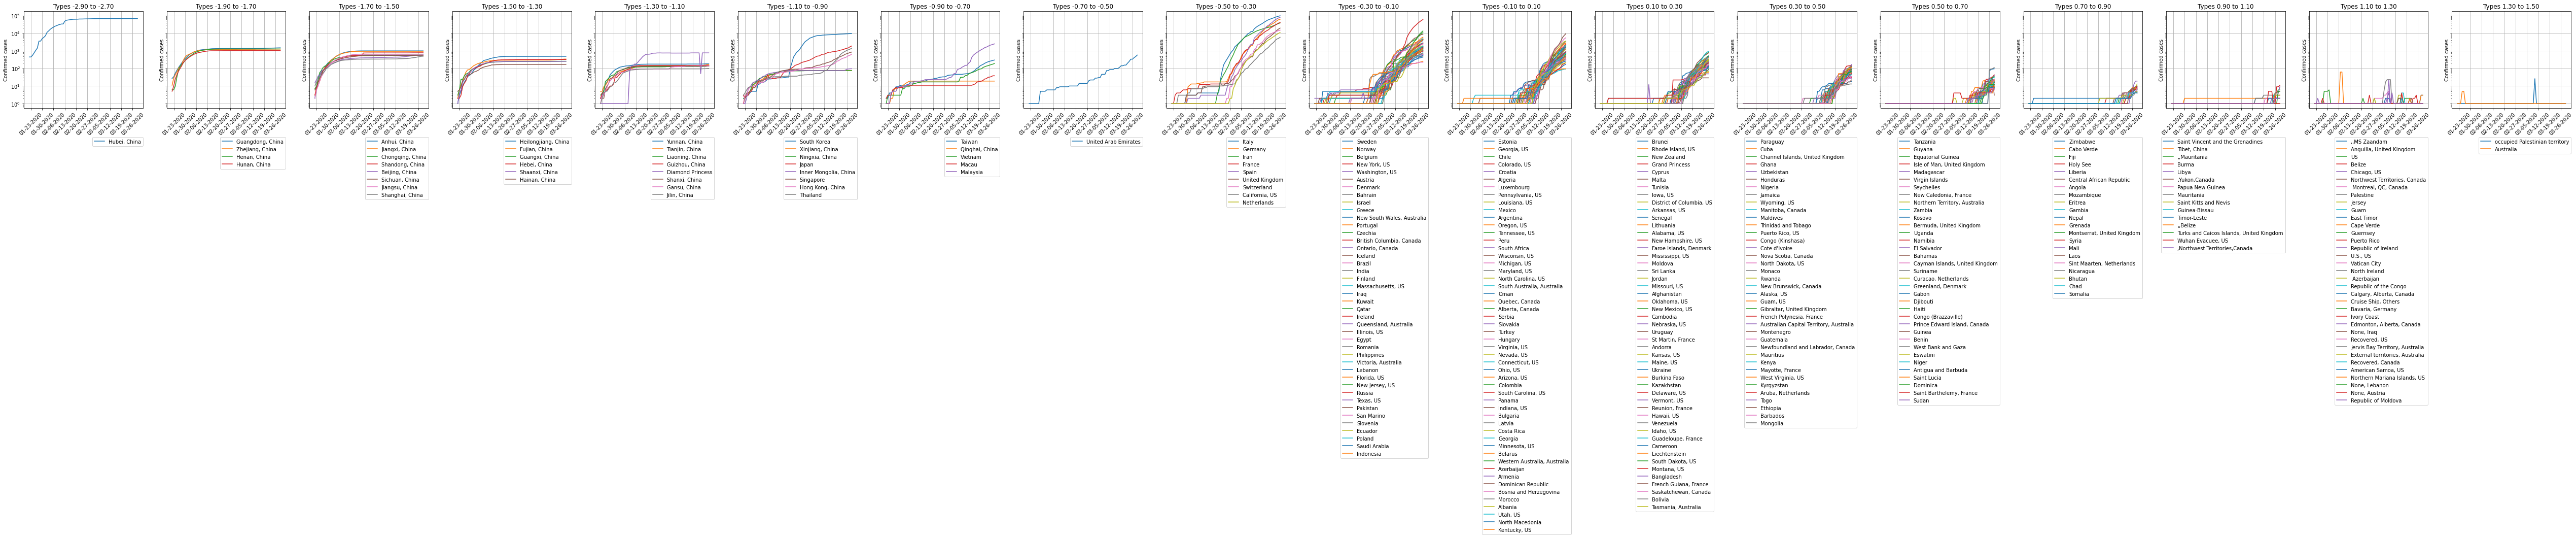

In [25]:
plot_by_code(data)

plt.savefig('plot_by_code.png')

In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [27]:
@interact
def filter_by_code(center=(-2.0,2.0,0.01), width=(0,0.2,0.01)):
    sub_df = data.loc[(data['Type'] >= center-width/2)
             & (data['Type'] <= center + width/2)].iloc[:,1:]
    if len(sub_df>0):
      sub_df.T.plot(figsize=(8,6),logy=True)
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
      plt.grid()

interactive(children=(FloatSlider(value=0.0, description='center', max=2.0, min=-2.0, step=0.01), FloatSlider(…

#### Clean the data

In [28]:
data = data.loc[data.Type < 0.9]
data

,Type,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020
"Hubei, China",-2.731109,444.0,444.0,549.0,761.0,1058.0,1423.0,3554.0,3554.0,4903.0,5806.0,7153.0,11177.0,13522.0,16678.0,19665.0,22112.0,24953.0,27100.0,29631.0,31728.0,33366.0,33366.0,48206.0,54406.0,56249.0,58182.0,59989.0,61682.0,62031.0,62442.0,62662.0,64084.0,64084.0,64287.0,64786.0,65187.0,65596.0,65914.0,66337.0,66907.0,67103.0,67217.0,67332.0,67466.0,67592.0,67666.0,67707.0,67743.0,67760.0,67773.0,67781.0,67786.0,67790.0,67794.0,67798.0,67799.0,67800.0,67800.0,67800.0,67800.0,67800.0,67800.0,67801.0,67801.0,67801.0,67801.0,67801.0,67801.0
"Guangdong, China",-1.839364,26.0,32.0,53.0,78.0,111.0,151.0,207.0,277.0,354.0,436.0,535.0,632.0,725.0,813.0,895.0,970.0,1034.0,1095.0,1131.0,1159.0,1177.0,1219.0,1241.0,1261.0,1294.0,1316.0,1322.0,1328.0,1331.0,1332.0,1333.0,1339.0,1342.0,1345.0,1347.0,1347.0,1347.0,1348.0,1349.0,1349.0,1350.0,1350.0,1350.0,1351.0,1352.0,1352.0,1352.0,1352.0,1353.0,1356.0,1356.0,1356.0,1356.0,1360.0,1361.0,1364.0,1370.0,1378.0,1395.0,1400.0,1407.0,1415.0,1428.0,1433.0,1448.0,1456.0,1467.0,1475.0
"Zhejiang, China",-1.799503,10.0,27.0,43.0,62.0,104.0,128.0,173.0,296.0,428.0,538.0,599.0,661.0,724.0,829.0,895.0,954.0,1006.0,1048.0,1075.0,1092.0,1117.0,1131.0,1145.0,1155.0,1162.0,1167.0,1171.0,1172.0,1174.0,1175.0,1203.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1206.0,1213.0,1213.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1227.0,1231.0,1231.0,1232.0,1232.0,1233.0,1234.0,1236.0,1237.0,1238.0,1240.0,1241.0,1243.0,1247.0,1251.0,1254.0
"Henan, China",-1.729468,5.0,5.0,9.0,32.0,83.0,128.0,168.0,206.0,278.0,352.0,422.0,493.0,566.0,675.0,764.0,851.0,914.0,981.0,1033.0,1073.0,1105.0,1135.0,1169.0,1184.0,1212.0,1231.0,1246.0,1257.0,1262.0,1265.0,1267.0,1270.0,1271.0,1271.0,1271.0,1271.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1274.0,1274.0,1274.0,1275.0,1275.0,1275.0,1276.0
"Hunan, China",-1.709450,4.0,9.0,24.0,43.0,69.0,100.0,143.0,221.0,277.0,332.0,389.0,463.0,521.0,593.0,661.0,711.0,772.0,803.0,838.0,879.0,912.0,946.0,968.0,988.0,1001.0,1004.0,1006.0,1007.0,1008.0,1010.0,1011.0,1013.0,1016.0,1016.0,1016.0,1016.0,1017.0,1017.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sint Maarten, Netherlands",0.779470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,6.0
Nicaragua,0.781034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Rate of change

#### Approximate as diff(log(1+x),7)

In [29]:
lag = 7
change = pd.DataFrame((np.log(data.iloc[:,1+lag:-1].values+1)
                      - np.log(data.iloc[:,1:-1-lag].values+1))/lag,
                      index = data.index,
                      columns = data.columns[1+lag:-1])
change

,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020
"Hubei, China",0.296862,0.342819,0.336700,0.319926,0.336660,0.321560,0.220828,0.244362,0.215159,0.208281,0.190271,0.139272,0.121834,0.099060,0.075525,0.111334,0.111351,0.104319,0.096391,0.090992,0.087777,0.088583,0.036964,0.020183,0.018629,0.013802,0.009885,0.007014,0.007089,0.007039,0.007228,0.004936,0.006158,0.006124,0.005262,0.004625,0.004016,0.003591,0.002834,0.001698,0.001356,0.001149,0.000933,0.000665,0.000409,0.000262,0.000183,0.000116,0.000082,0.000057,0.000040,0.000030,0.000021,0.000013,0.000004,0.000004,0.000002,0.000002,0.000002,0.000002
"Guangdong, China",0.333112,0.339373,0.298707,0.273527,0.247425,0.223381,0.194917,0.167188,0.143744,0.123175,0.102184,0.083039,0.066946,0.052802,0.044095,0.035165,0.028328,0.023835,0.021624,0.018783,0.017230,0.012547,0.010101,0.007926,0.004880,0.002793,0.002462,0.002028,0.001706,0.001599,0.001597,0.001062,0.000743,0.000530,0.000318,0.000318,0.000423,0.000423,0.000317,0.000317,0.000211,0.000317,0.000633,0.000527,0.000422,0.000422,0.000842,0.000947,0.001156,0.001466,0.002297,0.004048,0.004559,0.004850,0.005555,0.006546,0.006418,0.007074,0.006110,0.006674
"Zhejiang, China",0.470834,0.389893,0.357932,0.321971,0.263044,0.246623,0.223196,0.157744,0.114322,0.089288,0.079809,0.069391,0.058644,0.042553,0.033400,0.026046,0.019713,0.014738,0.011720,0.009969,0.006860,0.005326,0.003692,0.005812,0.005187,0.004574,0.004085,0.003964,0.003720,0.003599,0.000237,0.000000,0.000000,0.000118,0.000945,0.000945,0.001180,0.001180,0.001180,0.001180,0.001061,0.000235,0.000235,0.000000,0.000000,0.001403,0.001867,0.001867,0.001983,0.001983,0.002099,0.002215,0.001043,0.000694,0.000809,0.000924,0.001039,0.001153,0.001496,0.001722
"Henan, China",0.505851,0.548493,0.509126,0.364409,0.253103,0.211507,0.198042,0.186737,0.159482,0.136065,0.120317,0.105522,0.091255,0.070330,0.056485,0.045310,0.036939,0.030180,0.025029,0.021336,0.018396,0.015140,0.011266,0.009671,0.006672,0.004565,0.002836,0.001581,0.001014,0.000788,0.000562,0.000225,0.000112,0.000112,0.000112,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000112,0.000112,0.000112,0.000224,0.000224,0.000224
"Hunan, China",0.541891,0.475005,0.369895,0.311708,0.270198,0.234650,0.202438,0.156084,0.134351,0.120305,0.103350,0.084618,0.074608,0.061408,0.051148,0.044027,0.035202,0.031451,0.025790,0.019258,0.014141,0.009059,0.006062,0.003284,0.001701,0.001696,0.001412,0.001270,0.001128,0.000986,0.000844,0.000703,0.000281,0.000281,0.000281,0.000281,0.000140,0.000140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sint Maarten, Netherlands",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

#### Clip outliers

In [30]:
change = change.loc[change.min(axis=1)>-1.0]
change = change.loc[change.max(axis=1)<3.0]
change.shape

(287, 60)

In [31]:
np.mean(change.values.flatten()>1),np.mean(change.values.flatten()<0)

(0.0, 0.0016260162601626016)

In [59]:
change

,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020
"Hubei, China",0.296862,0.342819,0.336700,0.319926,0.336660,0.321560,0.220828,0.244362,0.215159,0.208281,0.190271,0.139272,0.121834,0.099060,0.075525,0.111334,0.111351,0.104319,0.096391,0.090992,0.087777,0.088583,0.036964,0.020183,0.018629,0.013802,0.009885,0.007014,0.007089,0.007039,0.007228,0.004936,0.006158,0.006124,0.005262,0.004625,0.004016,0.003591,0.002834,0.001698,0.001356,0.001149,0.000933,0.000665,0.000409,0.000262,0.000183,0.000116,0.000082,0.000057,0.000040,0.000030,0.000021,0.000013,0.000004,0.000004,0.000002,0.000002,0.000002,0.000002
"Guangdong, China",0.333112,0.339373,0.298707,0.273527,0.247425,0.223381,0.194917,0.167188,0.143744,0.123175,0.102184,0.083039,0.066946,0.052802,0.044095,0.035165,0.028328,0.023835,0.021624,0.018783,0.017230,0.012547,0.010101,0.007926,0.004880,0.002793,0.002462,0.002028,0.001706,0.001599,0.001597,0.001062,0.000743,0.000530,0.000318,0.000318,0.000423,0.000423,0.000317,0.000317,0.000211,0.000317,0.000633,0.000527,0.000422,0.000422,0.000842,0.000947,0.001156,0.001466,0.002297,0.004048,0.004559,0.004850,0.005555,0.006546,0.006418,0.007074,0.006110,0.006674
"Zhejiang, China",0.470834,0.389893,0.357932,0.321971,0.263044,0.246623,0.223196,0.157744,0.114322,0.089288,0.079809,0.069391,0.058644,0.042553,0.033400,0.026046,0.019713,0.014738,0.011720,0.009969,0.006860,0.005326,0.003692,0.005812,0.005187,0.004574,0.004085,0.003964,0.003720,0.003599,0.000237,0.000000,0.000000,0.000118,0.000945,0.000945,0.001180,0.001180,0.001180,0.001180,0.001061,0.000235,0.000235,0.000000,0.000000,0.001403,0.001867,0.001867,0.001983,0.001983,0.002099,0.002215,0.001043,0.000694,0.000809,0.000924,0.001039,0.001153,0.001496,0.001722
"Henan, China",0.505851,0.548493,0.509126,0.364409,0.253103,0.211507,0.198042,0.186737,0.159482,0.136065,0.120317,0.105522,0.091255,0.070330,0.056485,0.045310,0.036939,0.030180,0.025029,0.021336,0.018396,0.015140,0.011266,0.009671,0.006672,0.004565,0.002836,0.001581,0.001014,0.000788,0.000562,0.000225,0.000112,0.000112,0.000112,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000112,0.000112,0.000112,0.000224,0.000224,0.000224
"Hunan, China",0.541891,0.475005,0.369895,0.311708,0.270198,0.234650,0.202438,0.156084,0.134351,0.120305,0.103350,0.084618,0.074608,0.061408,0.051148,0.044027,0.035202,0.031451,0.025790,0.019258,0.014141,0.009059,0.006062,0.003284,0.001701,0.001696,0.001412,0.001270,0.001128,0.000986,0.000844,0.000703,0.000281,0.000281,0.000281,0.000281,0.000140,0.000140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sint Maarten, Netherlands",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

#### Sort changes

In [62]:
sorted_change = pd.DataFrame(np.sort(change.values,axis=1)[:,::-1],
                              index= change.index, 
                              columns=np.arange(1,1+len(change.columns)))

sorted_change.to_csv('covid19_confirmed_sorted_change.csv')
sorted_change

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
"Hubei, China",0.342819,0.336700,0.336660,0.321560,0.319926,0.296862,0.244362,0.220828,0.215159,0.208281,0.190271,0.139272,0.121834,0.111351,0.111334,0.104319,0.099060,0.096391,0.090992,0.088583,0.087777,0.075525,0.036964,0.020183,0.018629,0.013802,0.009885,0.007228,0.007089,0.007039,0.007014,0.006158,0.006124,0.005262,0.004936,0.004625,0.004016,0.003591,0.002834,0.001698,0.001356,0.001149,0.000933,0.000665,0.000409,0.000262,0.000183,0.000116,0.000082,0.000057,0.000040,0.000030,0.000021,0.000013,0.000004,0.000004,0.000002,0.000002,0.000002,0.000002
"Guangdong, China",0.339373,0.333112,0.298707,0.273527,0.247425,0.223381,0.194917,0.167188,0.143744,0.123175,0.102184,0.083039,0.066946,0.052802,0.044095,0.035165,0.028328,0.023835,0.021624,0.018783,0.017230,0.012547,0.010101,0.007926,0.007074,0.006674,0.006546,0.006418,0.006110,0.005555,0.004880,0.004850,0.004559,0.004048,0.002793,0.002462,0.002297,0.002028,0.001706,0.001599,0.001597,0.001466,0.001156,0.001062,0.000947,0.000842,0.000743,0.000633,0.000530,0.000527,0.000423,0.000423,0.000422,0.000422,0.000318,0.000318,0.000317,0.000317,0.000317,0.000211
"Zhejiang, China",0.470834,0.389893,0.357932,0.321971,0.263044,0.246623,0.223196,0.157744,0.114322,0.089288,0.079809,0.069391,0.058644,0.042553,0.033400,0.026046,0.019713,0.014738,0.011720,0.009969,0.006860,0.005812,0.005326,0.005187,0.004574,0.004085,0.003964,0.003720,0.003692,0.003599,0.002215,0.002099,0.001983,0.001983,0.001867,0.001867,0.001722,0.001496,0.001403,0.001180,0.001180,0.001180,0.001180,0.001153,0.001061,0.001043,0.001039,0.000945,0.000945,0.000924,0.000809,0.000694,0.000237,0.000235,0.000235,0.000118,0.000000,0.000000,0.000000,0.000000
"Henan, China",0.548493,0.509126,0.505851,0.364409,0.253103,0.211507,0.198042,0.186737,0.159482,0.136065,0.120317,0.105522,0.091255,0.070330,0.056485,0.045310,0.036939,0.030180,0.025029,0.021336,0.018396,0.015140,0.011266,0.009671,0.006672,0.004565,0.002836,0.001581,0.001014,0.000788,0.000562,0.000225,0.000224,0.000224,0.000224,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Hunan, China",0.541891,0.475005,0.369895,0.311708,0.270198,0.234650,0.202438,0.156084,0.134351,0.120305,0.103350,0.084618,0.074608,0.061408,0.051148,0.044027,0.035202,0.031451,0.025790,0.019258,0.014141,0.009059,0.006062,0.003284,0.001701,0.001696,0.001412,0.001270,0.001128,0.000986,0.000844,0.000703,0.000281,0.000281,0.000281,0.000281,0.000140,0.000140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sint Maarten, Netherlands",0.198042,0.198042,0.156945,0.156945,0.099021,0.099021,0.099021,0.099021,0.099021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nicaragua,0.156945,0.156945,0.156945,0.156945,0.156945,0.099021,0.099021,0.072975,0.057924,0.057924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

#### Calculate change encoding

In [63]:
x_train, x_test = train_test_split(sorted_change, test_size=0.25, random_state=42)
sorted_change = pd.concat([x_train,x_test], axis=0)

x_train.shape, x_test.shape

((215, 60), (72, 60))

In [64]:
seed(100)
set_random_seed(100)

vae = make_vae(input_shape=(x_train.shape[1],))

vae.compile(optimizer='adam', loss=None)

n_batch_sizes=5

history = ['']*n_batch_sizes
titles  = ['']*n_batch_sizes

# Train the VAE on boston housing data

for i in range(n_batch_sizes):

  # Alternate between a few epochs with large batch size (realiable decrease in 
  # loss but weak and overfitting) and a few epochs with small batch size
  # (strong and non-overfitting but could increase loss)
  batch_size = 512*(1-(i%2)) + 16*(i%2)
  epochs = 20*(1-(i%2)) + 60*(i%2)

  print('Batch size:', batch_size)
  titles[i] = 'Round {}, Batch size {}'.format(i+1, batch_size)

  history[i] = vae.fit(x=x_train, y=None,
                       shuffle=True,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(x_test, None))

Batch size: 512
Train on 215 samples, validate on 72 samples
Epoch 1/20
215/215 [==============================] - 0s 2ms/sample - loss: 0.0218 - val_loss: 0.0153
Epoch 2/20
215/215 [==============================] - 0s 34us/sample - loss: 0.0146 - val_loss: 0.0109
Epoch 3/20
215/215 [==============================] - 0s 31us/sample - loss: 0.0101 - val_loss: 0.0114
Epoch 4/20
215/215 [==============================] - 0s 31us/sample - loss: 0.0119 - val_loss: 0.0114
Epoch 5/20
215/215 [==============================] - 0s 30us/sample - loss: 0.0082 - val_loss: 0.0099
Epoch 6/20
215/215 [==============================] - 0s 33us/sample - loss: 0.0085 - val_loss: 0.0093
Epoch 7/20
215/215 [==============================] - 0s 35us/sample - loss: 0.0077 - val_loss: 0.0073
Epoch 8/20
215/215 [==============================] - 0s 39us/sample - loss: 0.0077 - val_loss: 0.0062
Epoch 9/20
215/215 [==============================] - 0s 59us/sample - loss: 0.0064 - val_loss: 0.0049
Epoch 10/20
2

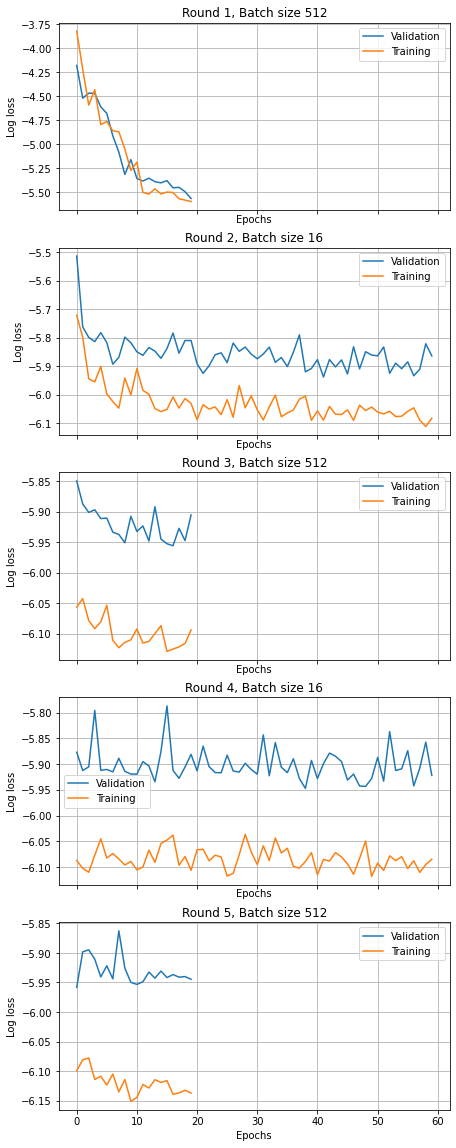

In [65]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(len(history), 1, figsize=(7, len(history)*4), sharex=True)

for i in range(len(history)):

  ax[i].set_title(titles[i])
  ax[i].plot(history[i].epoch, np.log(history[i].history['val_loss']), label='Validation')
  ax[i].plot(history[i].epoch, np.log(history[i].history['loss']), label='Training')
  ax[i].set_xlabel('Epochs')
  ax[i].set_ylabel('Log loss')
  ax[i].legend()
  ax[i].grid()

In [68]:
encoded_data=pd.DataFrame(vae.encoder.predict(sorted_change),
                          index=sorted_change.index, columns=['Type'])
New_York_sign = np.sign(encoded_data.loc['New York, US','Type'])
if New_York_sign == 1.0:
  encoded_data['Type'] *= -1.0
New_York_sign, encoded_data.loc['New York, US','Type']

(1.0, -1.8261873)

In [69]:
min_x, max_x, grid_n = -2, 2, 401
grid_x = np.linspace(min_x,max_x,grid_n)
decoded=vae.decoder.predict(grid_x)
if New_York_sign == 1.0:
  decoded = np.flip(decoded,axis=0)
decoded.shape

(401, 60)

#### Explore change types

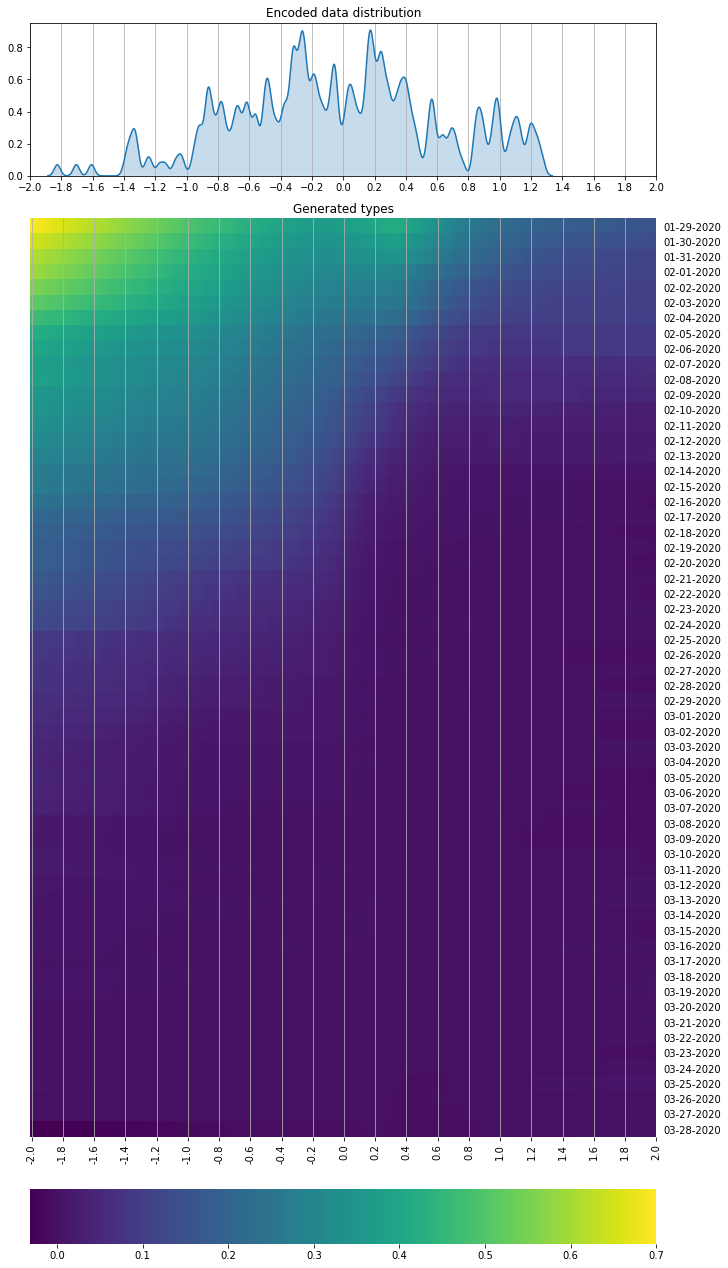

In [70]:
plot_type_dist(encoded_data.values.flatten(), grid_x, decoded, 
               vertical_n=7, feature_labels=change.columns)

plt.savefig('plot_dist_type.png')

In [71]:
sorted_change = encoded_data.join(sorted_change)

sorted_change = sorted_change.sort_values(by='Type')

sorted_change.to_csv('covid19_confirmed_sorted_change.csv')
sorted_change

,Type,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
"New York, US",-1.826187,0.667547,0.620544,0.609957,0.580063,0.515845,0.454008,0.443283,0.438793,0.438669,0.425761,0.416179,0.398826,0.387293,0.374001,0.359170,0.354987,0.347727,0.346326,0.326205,0.279184,0.274902,0.274499,0.273198,0.240906,0.214084,0.156945,0.099021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iran,-1.704568,0.652050,0.589591,0.549004,0.540599,0.530510,0.481042,0.456039,0.455345,0.443192,0.434103,0.431369,0.431306,0.420634,0.379883,0.357414,0.326123,0.271897,0.255966,0.223142,0.176562,0.160675,0.156945,0.150486,0.124688,0.111711,0.107519,0.105532,0.099765,0.093850,0.086090,0.078183,0.077306,0.071181,0.068838,0.066921,0.063174,0.062830,0.061450,0.061167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Italy,-1.607442,0.728552,0.675972,0.627337,0.578826,0.535082,0.523366,0.412279,0.393834,0.340797,0.311593,0.292513,0.273976,0.253143,0.236890,0.235961,0.235844,0.214969,0.210078,0.199998,0.199228,0.191042,0.182826,0.172930,0.170241,0.167479,0.161819,0.159323,0.156945,0.156945,0.156945,0.156945,0.156945,0.156945,0.156945,0.150397,0.139894,0.132734,0.124449,0.118033,0.112351,0.104820,0.096418,0.087074,0.077966,0.041097,0.041097,0.041097,0.041097,0.041097,0.041097,0.041097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turkey,-1.390180,0.739219,0.673859,0.652792,0.626941,0.584906,0.557425,0.553029,0.523442,0.457453,0.420634,0.419185,0.394563,0.342982,0.277987,0.255966,0.255966,0.099021,0.099021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spain,-1.366785,0.528168,0.477720,0.452297,0.398299,0.395445,0.390004,0.366968,0.363742,0.356779,0.349789,0.342556,0.341138,0.332006,0.331983,0.317926,0.311908,0.310053,0.295797,0.295010,0.276499,0.258483,0.239139,0.220064,0.196960,0.194441,0.185650,0.181374,0.180341,0.174608,0.167047,0.166913,0.151418,0.121043,0.099021,0.099021,0.099021,0.099021,0.099021,0.099021,0.099021,0.057924,0.057924,0.057924,0.057924,0.057924,0.057924,0.057924,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sudan,1.213371,0.156945,0.156945,0.099021,0.099021,0.099021,0.099021,0.099021,0.099021,0.099021,0.057924,0.057924,0.057924,0.057924,0.041097,0.041097,0.041097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nepal,1.225943,0.156945,0.130899,0.099021,0.099021,0.099021,0.099021,0.099021,0.057924,0.057924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
def plot_by_code(data, center=(-5.0,5.0,0.2), width=0.2):
    centers = np.arange(*center)
    sub_df=OrderedDict((centers[i], 
                        data.loc[(data['Type'] >= centers[i]-width/2)
                                  & (data['Type'] <= 
                                     centers[i] + width/2)].iloc[:,1:])
                       for i in range(len(centers)))
    sub_df = OrderedDict(filter(lambda x: len(x[1])>0, sub_df.items()))
    fig, ax = plt.subplots(1,len(sub_df), 
                           figsize = (5*len(sub_df),3.5), 
                           sharey=True)
    for i, center in zip(range(len(sub_df)),sub_df.keys()):
      #sub_df[center]= sub_df[center]+1
      ax[i].plot(sub_df[center].T)
      #ax[i].set_yscale('log')
      ax[i].set_ylabel('Confirmed cases')
      ax[i].legend(sub_df[center].index, bbox_to_anchor=(1, -0.3),
                   loc='upper right',borderaxespad=0.)
      ax[i].set_title('Types {:.2f} to {:.2f}'.format(center - width/2,
                                                      center + width/2))
      ax[i].grid(True)
      ax[i].set_xticks(range(1,sub_df[center].shape[1],7))
      ax[i].tick_params(axis='x',labelrotation=45)

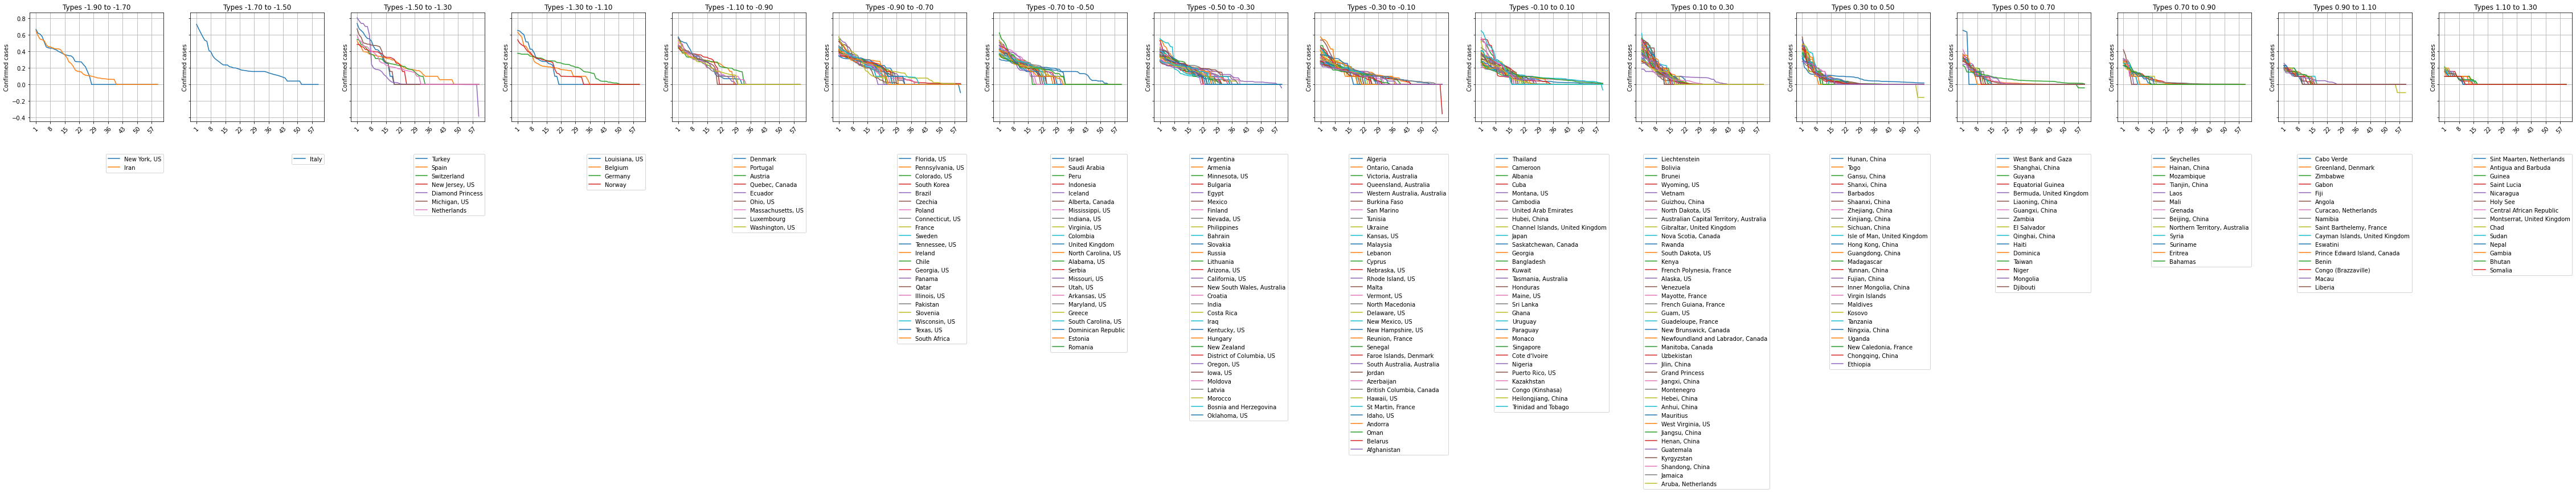

In [75]:
plot_by_code(sorted_change)

plt.savefig('plot_by_code.png')

### Explore x10 intervals

In [0]:
df4 = pd.DataFrame({'{}-{}'.format(j*100,j*1000): 
                   [np.sum(confirmed.iloc[i,1:] > 100*j) - np.sum(confirmed.iloc[i,1:] > 1000*j) 
                   for i in range(confirmed.shape[0])] for j in range(1,6)}, 
                   index=confirmed.index)

df5 = df4.loc[confirmed.iloc[:,-1]>5000]
df5

,100-1000,200-2000,300-3000,400-4000,500-5000
Turkey,3,5,6,6,6
United Kingdom,9,11,11,10,8
Austria,8,8,10,10,11
Spain,7,7,7,6,5
"California, US",11,11,12,12,12
Germany,7,8,8,9,9
"New Jersey, US",5,6,5,6,7
"Hubei, China",3,5,5,7,7
Netherlands,9,10,12,11,13
France,7,8,8,8,10
